# Introduction à scipy
Nous passons maintenant à scipy. 
Scipy est une collection de fonction diverse telle que des fonction pour l'optimisation, les distribution ou l'integration.
Pour plus d'info voir https://docs.scipy.org/doc/scipy-1.0.0/reference/tutorial/general.html

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy

Scipy se montre très pratique pour minimiser des fonction. 
Par exemple la fonction dites 'la banane':
$$
f(x) = \sum_{i=1}^{N-1} 100(x_i - x_{i-1}^2)^2 + (1-x_{i-1})^2
$$. 
Le minimum se trouve à $x = [1,..,1]$ et pour $f(x) = 0$.

In [7]:
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

On visualise la fonction pour avoir une meilleure idée de son comportment en dimension 2.

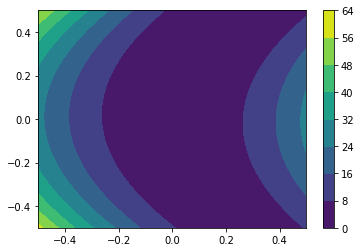

In [19]:
X1 = np.linspace(-0.5, 0.5, 100)
X2 = np.linspace(-0.5, 0.5, 100)

# On construit une grille pour visualiser la fonction
param_grid = np.array([[X1i, X2i] for X1i in X1 for X2i in X2])
function_value = [rosen(params[:,np.newaxis]) for params in param_grid]

C, G = np.meshgrid(X1, X2)
plt.figure()
cp = plt.contourf(C, G, np.array(function_value).reshape(C.shape)) # pour visuliser des fonction en 3d
plt.colorbar(cp)


In [18]:
from scipy.optimize import minimize

x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571


In [22]:
print res.keys() # les resultats de la procedure d'optimisation
res['x']

['status', 'success', 'final_simplex', 'nfev', 'fun', 'x', 'message', 'nit']


array([1., 1., 1., 1., 1.])

## Exercise: 
Chercher l'optimum $(a,b)$ pour le problème de moindre carré 
$$
\min \| y_i - a+b*x_i \|
$$
On utilise le code de la derniere question sur de matplotlib (a priori vous connaisez les "vraies" valeurs de $(a,b)$). 

On procède par:

a) Coder la fonction a minimiser associé. Important: assurer que $y et x$ sont fixés !

b) Visualiser la fonction à minimiser comme ci-dessus

c) Appliquer la procedure de minimisation (attention: vous devez eventuellement regarder la documentation pour donner des arguments en plus à la fonction)

d) Le resultat correspond il à ce que vous vous attendez ? 

## Scipy stats
Numpy vient avec pas mal de fonctionnalité pour simuler des variables aléatoire. 
Pourtant la bibliothèque de scipy et plus riches et permet de faire plus de choses outils pour un data scientist. On introduit maintenant les fonctionalités pour des distributions statistiques

In [23]:
from scipy.stats import gamma

In [50]:
help(gamma)

Help on gamma_gen in module scipy.stats._continuous_distns object:

class gamma_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  A gamma continuous random variable.
 |  
 |  %(before_notes)s
 |  
 |  See Also
 |  --------
 |  erlang, expon
 |  
 |  Notes
 |  -----
 |  The probability density function for `gamma` is:
 |  
 |  .. math::
 |  
 |      f(x, a) = \frac{x^{a-1} \exp(-x)}{\Gamma(a)}
 |  
 |  for :math:`x \ge 0`, :math:`a > 0`. Here :math:`\Gamma(a)` refers to the
 |  gamma function.
 |  
 |  `gamma` has a shape parameter `a` which needs to be set explicitly.
 |  
 |  When :math:`a` is an integer, `gamma` reduces to the Erlang
 |  distribution, and when :math:`a=1` to the exponential distribution.
 |  
 |  %(after_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      gamma_gen
 |      scipy.stats._distn_infrastructure.rv_continuous
 |      scipy.stats._distn_infrastructure.rv_generic
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  fit

In [33]:
rv = gamma(1, scale=2.) # on genere la variable aléatoire, on fixe la variable aléatoire

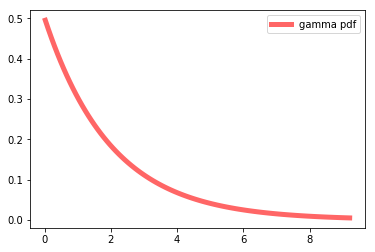

In [34]:
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv.pdf(x), 'r-', lw=5, alpha=0.6, label='gamma pdf')
ax.legend()


In [35]:
rv.mean(), rv.std() # les valeur théorique

(2.0, 2.0)

In [38]:
# on compare avec des simulations
r = rv.rvs(size=1000)
print r.mean(), r.std()

2.042737131855666 1.9986436020424798


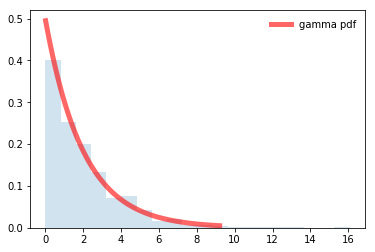

In [51]:
plt.plot(x, rv.pdf(x), 'r-', lw=5, alpha=0.6, label='gamma pdf')
plt.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins=20)
plt.legend(loc='best', frameon=False)
plt.show()

In [49]:
# on peut aussi 'fiter' des données
gamma.fit(r)
# cela renvoie les EMV pour shape, location, scale 

(0.9625324699529472, 0.003219257820760617, 2.0170167633496874)

## Exercise
    1. Reproduisez ce qu'on vient de faire pour une distribution gaussienne avec les paramètres $ \mu = 1.5, \sigma = 2 $ 
    2. Utiliser le module scipy integrate pour calculer $ \mathbb{P}(X\leq 1) $ où $ X $ suit une loi exponentiel de paramètre $\lambda = 2$. Faites la même chose avec les distributions stats de scipy, à la main et par Monte Carlo. 